In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import NearestNeighbors

### EXPLORATORY DATA ANALYSIS (EDA)

In [2]:
df = pd.read_csv('movies.csv')

In [4]:
### Now Lets show the shape of the dataset, column types etx

df_info = df.info()
df_shape = df.shape
df_head = df.head()
df_missing = df.isnull().sum()

df_shape, df_info, df_missing.head(10), df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

((4803, 24),
 None,
 index                   0
 budget                  0
 genres                 28
 homepage             3091
 id                      0
 keywords              412
 original_language       0
 original_title          0
 overview                3
 popularity              0
 dtype: int64,
    index     budget                                    genres  \
 0      0  237000000  Action Adventure Fantasy Science Fiction   
 1      1  300000000                  Adventure Fantasy Action   
 2      2  245000000                    Action Adventure Crime   
 3      3  250000000               Action Crime Drama Thriller   
 4      4  260000000          Action Adventure Science Fiction   
 
                                        homepage      id  \
 0                   http://www.avatarmovie.com/   19995   
 1  http://disney.go.com/disneypictures/pirates/     285   
 2   http://www.sonypictures.com/movies/spectre/  206647   
 3            http://www.thedarkknightrises.com/   49026 

In [5]:
# Compute basic descriptive statistics
descriptive_stats = df[['budget', 'revenue', 'vote_average', 'runtime']].describe()

# Identify the top 10 highest-grossing movies
top_revenue_movies = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)

# Identify the top 10 highest-budget movies
top_budget_movies = df[['title', 'budget']].sort_values(by='budget', ascending=False).head(10)

# Correlation between budget and revenue
correlation_budget_revenue = df[['budget', 'revenue']].corr().iloc[0, 1]

descriptive_stats, top_revenue_movies, top_budget_movies, correlation_budget_revenue

(             budget       revenue  vote_average      runtime
 count  4.803000e+03  4.803000e+03   4803.000000  4801.000000
 mean   2.904504e+07  8.226064e+07      6.092172   106.875859
 std    4.072239e+07  1.628571e+08      1.194612    22.611935
 min    0.000000e+00  0.000000e+00      0.000000     0.000000
 25%    7.900000e+05  0.000000e+00      5.600000    94.000000
 50%    1.500000e+07  1.917000e+07      6.200000   103.000000
 75%    4.000000e+07  9.291719e+07      6.800000   118.000000
 max    3.800000e+08  2.787965e+09     10.000000   338.000000,
                           title     revenue
 0                        Avatar  2787965087
 25                      Titanic  1845034188
 16                 The Avengers  1519557910
 28               Jurassic World  1513528810
 44                    Furious 7  1506249360
 7       Avengers: Age of Ultron  1405403694
 124                      Frozen  1274219009
 31                   Iron Man 3  1215439994
 546                     Minions  11

In [6]:
correlation_budget_revenue

0.730822856924464

In [7]:
## Now lets check the most common genres


df['genres'] = df['genres'].fillna('').apply(lambda x: x.split())

In [8]:
# Flatten genre lists and count occurrences
genre_counts = Counter([genre for sublist in df['genres'] for genre in sublist])

# Get the top 10 genres
top_genres = genre_counts.most_common(10)

print(top_genres)

[('Drama', 2297), ('Comedy', 1722), ('Thriller', 1259), ('Action', 1153), ('Romance', 890), ('Adventure', 790), ('Crime', 696), ('Science', 530), ('Fiction', 530), ('Horror', 519)]


In [9]:
### Lets get the most common languages

most_common_language = df['original_language'].value_counts().idxmax()
language_counts = df['original_language'].value_counts()

print("Most common language:", most_common_language)
print("\nTop 10 languages:\n", language_counts.head(10))

Most common language: en

Top 10 languages:
 original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
Name: count, dtype: int64


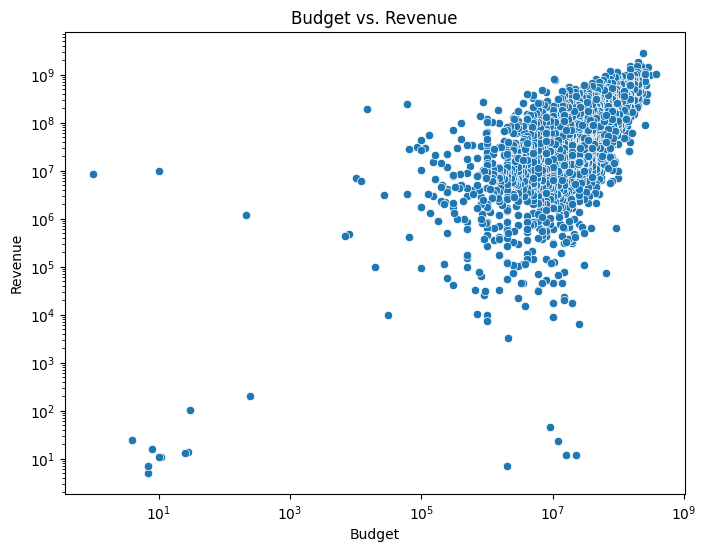

In [10]:
# Scatter plot of budget vs. revenue
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['budget'], y=df['revenue'])
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs. Revenue")
plt.xscale("log")  # Log scale to handle large values
plt.yscale("log")  # Log scale to handle large values
plt.show()


<ipython-input-11-e88fec361755>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genres), y=list(counts), palette="viridis")


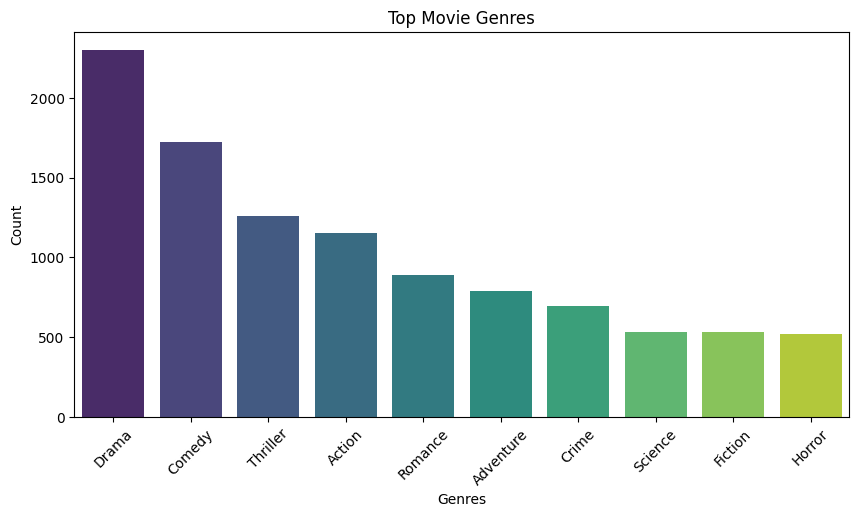

In [11]:
### Bar Chart to show the top genres

# Extract genre names and counts
genres, counts = zip(*top_genres)

# Create a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(genres), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Top Movie Genres")
plt.show()

#### This bar chart represents the distribution of movie genres in the dataset. The most common genres are Drama, Comedy, and Thriller, indicating their dominance in the dataset. Less frequent genres include Science Fiction and Horror.

### DATA CLEANING AND FEATURE ENGINEERING

In [12]:
# Step 1: Replace encoded characters
df['keywords'] = df['keywords'].apply(lambda x: x.encode('utf-8').decode('unicode_escape') if isinstance(x, str) else x)

# Step 2: Convert to list of words
df['keywords'] = df['keywords'].apply(lambda x: list(set(x.split())) if isinstance(x, str) else [])

# Show results
print(df['keywords'].head())

0    [society, war, future, culture, space, colony,...
1    [of, one's, abuse, island, east, india, life, ...
2    [based, spy, sequel, secret, on, agent, novel,...
3    [terrorist, burglar, fighter, comics, identity...
4    [based, travel, on, space, novel, medallion, m...
Name: keywords, dtype: object


In [13]:
#### Now Lets deal with missing values

df.isnull().sum()

,0
index,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0


#### Looking at it, the homepage column has a whole lot of missing values so its best we drop it and also for other columns with missing values we are going to fill up with placeholders

In [14]:
df.drop(columns=['homepage'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4803 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [16]:
df.fillna({
    'genres': 'Unknown',
    'keywords': 'Unknown',
    'overview': 'Unknown',
    'tagline': 'Unknown',
    'release_date': 'Unknown',
    'runtime': df['runtime'].median(),
    'cast': 'Unknown',
    'crew': 'Unknown',
    'director': 'Unknown'
}, inplace=True)

In [17]:
import ast
from sklearn.preprocessing import MinMaxScaler

df['spoken_languages'] = df['spoken_languages'].apply(lambda x: x.encode('utf-8').decode('unicode_escape') if isinstance(x, str) else x)

df['spoken_languages'] = df['spoken_languages'].apply(lambda x: list(set(x.split())) if isinstance(x, str) else [])

# Extract main cast (first 3 actors)
df['main_cast'] = df['cast'].apply(lambda x: x.split()[:3] if isinstance(x, str) else [])

# Normalize numeric features (budget and popularity)
scaler = MinMaxScaler()
df[['budget', 'popularity']] = scaler.fit_transform(df[['budget', 'popularity']])

# Verify the changes
df[['genres', 'keywords', 'spoken_languages', 'main_cast', 'budget', 'popularity']].head()


,genres,keywords,spoken_languages,main_cast,budget,popularity
0,"[Action, Adventure, Fantasy, Science, Fiction]","[society, war, future, culture, space, colony,...","[""Español""}], ""en"",, ""name"":, ""English""},, ""es...","[Sam, Worthington, Zoe]",0.623684,0.171815
1,"[Adventure, Fantasy, Action]","[of, one's, abuse, island, east, india, life, ...","[""en"",, [{""iso_639_1"":, ""name"":, ""English""}]]","[Johnny, Depp, Orlando]",0.789474,0.158846
2,"[Action, Adventure, Crime]","[based, spy, sequel, secret, on, agent, novel,...","[""fr"",, ""de"",, ""Español""},, ""Italiano""},, ""en""...","[Daniel, Craig, Christoph]",0.644737,0.122635
3,"[Action, Crime, Drama, Thriller]","[terrorist, burglar, fighter, comics, identity...","[""en"",, [{""iso_639_1"":, ""name"":, ""English""}]]","[Christian, Bale, Michael]",0.657895,0.128272
4,"[Action, Adventure, Science, Fiction]","[based, travel, on, space, novel, medallion, m...","[""en"",, [{""iso_639_1"":, ""name"":, ""English""}]]","[Taylor, Kitsch, Lynn]",0.684211,0.050169


In [18]:
df.to_csv('cleaned_movies.csv', index=False)

In [19]:
df_cleaned = pd.read_csv("cleaned_movies.csv")

### RECOMMENDATION PROTOTYPE

In [20]:
### Building the Recommendation Prototype

## Content-Based Filtering

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Fill any remaining missing values in text fields with an empty string
df_cleaned['overview'] = df_cleaned['overview'].fillna('')
df_cleaned['genres'] = df_cleaned['genres'].fillna('')
df_cleaned['keywords'] = df_cleaned['keywords'].fillna('')

# Create a combined feature column
df_cleaned['combined_features'] = df_cleaned['overview'] + ' ' + df_cleaned['genres'] + ' ' + df_cleaned['keywords']

# Convert text data into numerical vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_cleaned['combined_features'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend movies based on title
def recommend_movies(movie_title, df, cosine_sim_matrix):
    indices = pd.Series(df.index, index=df['title']).drop_duplicates()

    if movie_title not in indices:
        return ["Movie not found. Please try another title."]

    idx = indices[movie_title]

    # Get similarity scores and sort them
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 similar movies (excluding itself)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices].tolist()

In [21]:
## Now lets get the recommendation for avatar

recommend_movies("Avatar", df_cleaned, cosine_sim)

['Gattaca',
 'Lifeforce',
 'Apollo 18',
 'The Helix... Loaded',
 'The Inhabited Island',
 'Starship Troopers',
 'The Adventures of Pluto Nash',
 'Lockout',
 'Pocahontas',
 'The Matrix']

##### Lets enhance the recommendation system by incorporating popularity and director-based filtering

In [22]:
# Function to recommend movies with director matching and popularity boost
def recommend_movies_enhanced(movie_title, df, cosine_sim_matrix):
    indices = pd.Series(df.index, index=df['title']).drop_duplicates()

    if movie_title not in indices:
        return ["Movie not found. Please try another title."]

    idx = indices[movie_title]

    # Get similarity scores and sort them
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top 30 similar movies
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    similar_movies = df.iloc[movie_indices].copy()

    # Get the director of the input movie
    movie_director = df.loc[idx, 'director']

    # Boost movies with the same director
    similar_movies['director_match'] = (similar_movies['director'] == movie_director).astype(int)

    # Sort by director match first, then popularity
    similar_movies = similar_movies.sort_values(by=['director_match', 'popularity'], ascending=[False, False])

    # Return top 10 recommendations
    return similar_movies['title'].head(10).tolist()

In [23]:
recommend_movies_enhanced("Avatar", df_cleaned, cosine_sim)

['The Matrix',
 'Men in Black II',
 'Gattaca',
 'Starship Troopers',
 'Armageddon',
 'The Thing',
 'Sunshine',
 'Pocahontas',
 'Moon',
 'Treasure Planet']

In [24]:
recommend_movies_enhanced("Captain America: Civil War", df_cleaned, cosine_sim)

['Captain America: The Winter Soldier',
 'The Avengers',
 'X-Men: Apocalypse',
 'Avengers: Age of Ultron',
 'Iron Man',
 'Ant-Man',
 'X-Men: Days of Future Past',
 'Man of Steel',
 'Star Trek Into Darkness',
 'Iron Man 3']

### DASHBOARD OR VISUALIZATION

<ipython-input-25-70857686d97c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_revenue_movies['title'], x=top_revenue_movies['revenue'], palette="Blues_r")


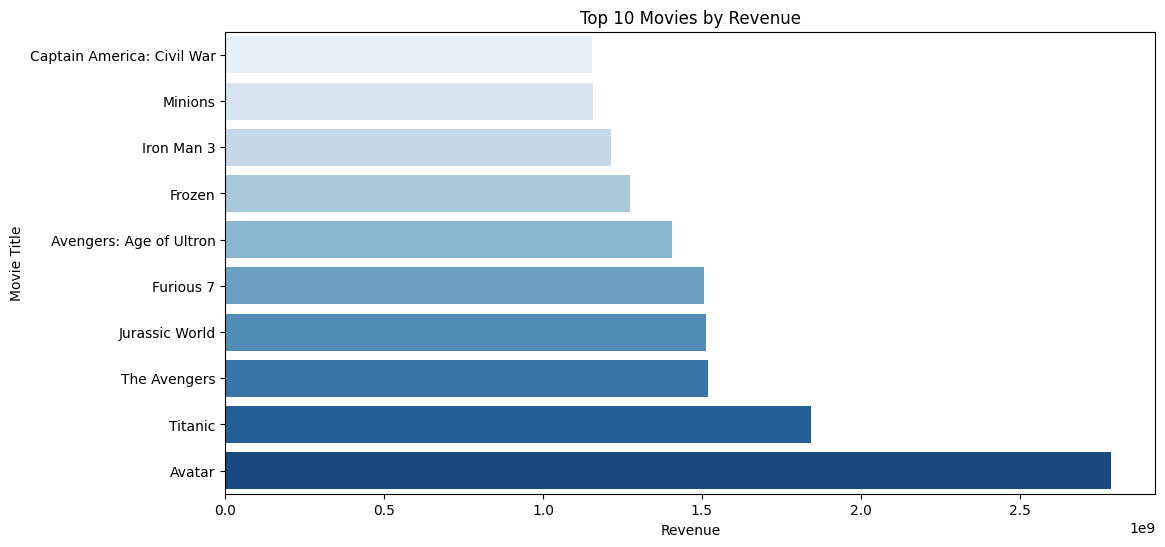

In [25]:
# Top 10 movies by revenue
top_revenue_movies = df_cleaned.nlargest(10, 'revenue')[['title', 'revenue']]

# Top 10 movies by vote_average
top_rated_movies = df_cleaned.nlargest(10, 'vote_average')[['title', 'vote_average']]

# Plot Top 10 Movies by Revenue
plt.figure(figsize=(12, 6))
sns.barplot(y=top_revenue_movies['title'], x=top_revenue_movies['revenue'], palette="Blues_r")
plt.xlabel("Revenue")
plt.ylabel("Movie Title")
plt.title("Top 10 Movies by Revenue")
plt.gca().invert_yaxis()
plt.show()


#### This visual displays the top 10 highest-grossing movies based on revenue. "Avatar" and "Titanic" lead with the highest earnings, followed by blockbusters like The Avengers, Jurassic World, and Furious 7.  The chart is sorted in descending order, with Captain America: Civil War having the lowest revenue among the top 10.

<ipython-input-26-b56741e13262>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rated_movies['title'], x=top_rated_movies['vote_average'], palette="Greens_r")


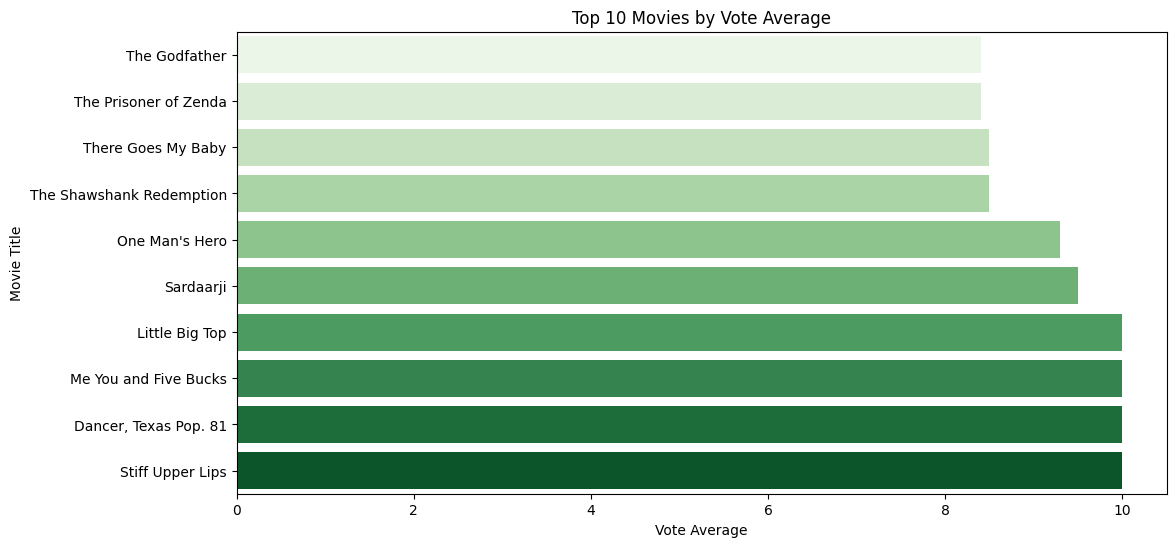

In [26]:
# Plot Top 10 Movies by Vote Average
plt.figure(figsize=(12, 6))
sns.barplot(y=top_rated_movies['title'], x=top_rated_movies['vote_average'], palette="Greens_r")
plt.xlabel("Vote Average")
plt.ylabel("Movie Title")
plt.title("Top 10 Movies by Vote Average")
plt.gca().invert_yaxis()
plt.show()

#### This bar chart visualizes the top 10 movies based on their average vote ratings. It uses a green gradient to indicate ranking, with darker shades representing higher ratings. The x-axis represents vote averages, while the y-axis lists movie titles. The Shawshank Redemption and The Godfather appear among the highest-rated films. Overall, the visualization provides insight into highly-rated movies and helps identify top performers based on audience feedback.

<ipython-input-27-24c5b0826216>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=genre_list, order=genre_list.value_counts().index, palette="coolwarm")


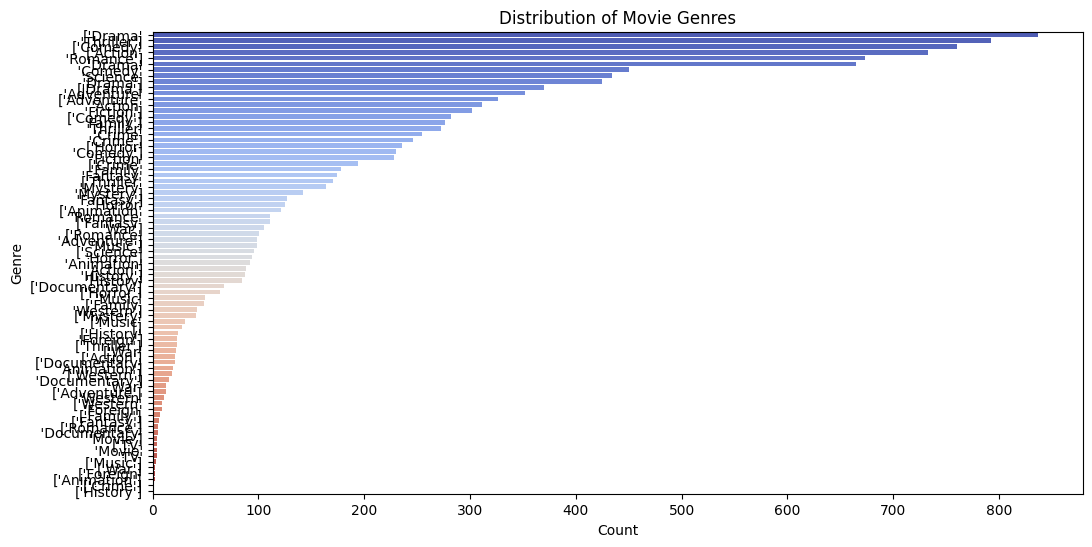

In [27]:
# Distribution of Genres
plt.figure(figsize=(12, 6))
df_cleaned['genres'] = df_cleaned['genres'].fillna('Unknown')
genre_list = df_cleaned['genres'].str.split(',').explode()
sns.countplot(y=genre_list, order=genre_list.value_counts().index, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Distribution of Movie Genres")
plt.show()

#### This horizontal bar chart visualizes the distribution of movie genres based on their frequency in the dataset. The x-axis represents the count of movies, while the y-axis lists different genres. The color gradient from red to blue indicates varying frequencies, with blue representing the most common genres and red representing the least. Drama, Comedy, and Action appear to be the most frequent genres. The overlapping and messy labels suggest that genre names may need better formatting or preprocessing to improve readability. Overall, this visualization provides insights into the most and least popular movie genres in the dataset.

<ipython-input-28-f873c216567b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['original_language'], order=df_cleaned['original_language'].value_counts().index, palette="magma")


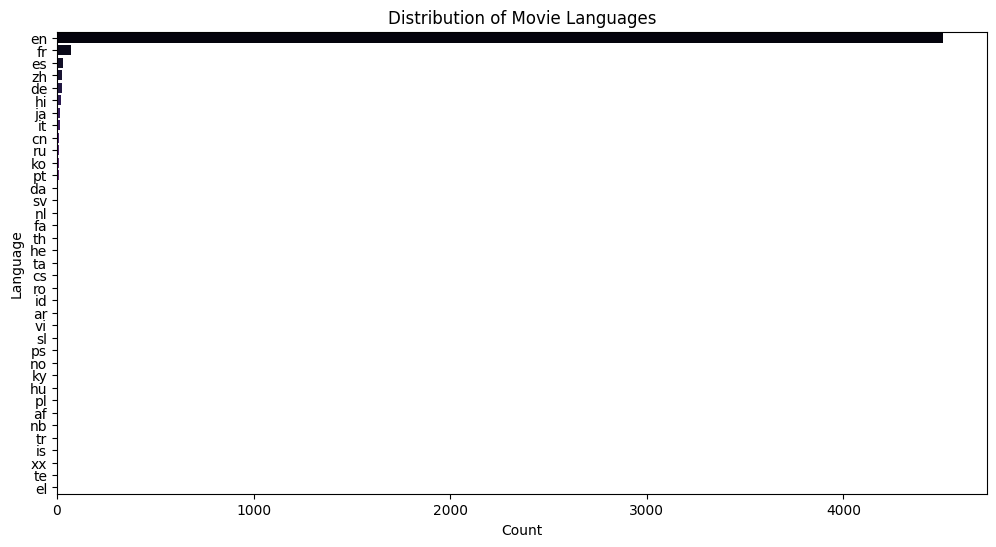

In [28]:
# Distribution of Languages
plt.figure(figsize=(12, 6))
df_cleaned['original_language'] = df_cleaned['original_language'].fillna('Unknown')
sns.countplot(y=df_cleaned['original_language'], order=df_cleaned['original_language'].value_counts().index, palette="magma")
plt.xlabel("Count")
plt.ylabel("Language")
plt.title("Distribution of Movie Languages")
plt.show()

#### This visualization displays the distribution of movie languages. The x-axis represents the count of movies, while the y-axis lists different languages. The chart shows a significant dominance of English ("en"), which far surpasses all other languages in frequency. Other languages like French ("fr"), Spanish ("es"), and Chinese ("zh") appear in much smaller proportions. The steep drop-off suggests that most movies in the dataset are in English, with only a minor presence of other languages. The visualization effectively highlights the imbalance in movie language representation, indicating a strong bias toward English-language films.